In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_object(filename):
    with open(filename, "rb") as file:
        _object = pickle.load(file)
    return _object


captured_screen = load_object("screen")

In [3]:
def display_image(image):
    plt.imshow(image)
    plt.show()

In [4]:
captured_screen.dtype

dtype('uint8')

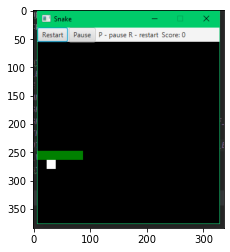

In [5]:
display_image(captured_screen)

# Constatnts

In [33]:
NUMBER_OF_BLOCKS = 20
BLOCK_SIZE = 16
COLOR_CHANNELS = 3
LOWER_HEIGHT_LIMIT = 56
UPPER_HEIGHT_LIMIT = LOWER_HEIGHT_LIMIT + NUMBER_OF_BLOCKS * BLOCK_SIZE
LOWER_WIDTH_LIMIT = 7
UPPER__WIDTH_LIMIT = LOWER_WIDTH_LIMIT + NUMBER_OF_BLOCKS * BLOCK_SIZE
MAX_PIXEL_VALUE = 255

## Cut edges of the screen

In [34]:
def cut_screen(captured_screen):
    cutted_screen = captured_screen[LOWER_HEIGHT_LIMIT:UPPER_HEIGHT_LIMIT,
                                    LOWER_WIDTH_LIMIT:UPPER__WIDTH_LIMIT]
    return cutted_screen

In [35]:
cutted_screen = cut_screen(captured_screen)
cutted_screen.shape

(320, 320, 3)

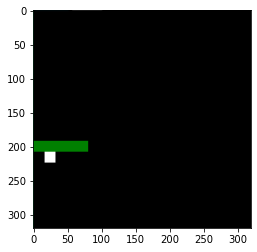

In [36]:
display_image(cut_screen(captured_screen))

## Take only one pixel from every block

In [10]:
def shred_screen(cutted_screen):
    grid_shape = (NUMBER_OF_BLOCKS, NUMBER_OF_BLOCKS, COLOR_CHANNELS)
    shredded_screen = np.zeros(grid_shape, dtype=cutted_screen.dtype)
    # i,j iterate thougth shredded_screen
    # x,y iterate thougth cutted_screen
    first_pixel = BLOCK_SIZE // 2
    x = first_pixel
    i = 0
    while x < NUMBER_OF_BLOCKS * BLOCK_SIZE:
        y = first_pixel
        j = 0
        while y < NUMBER_OF_BLOCKS * BLOCK_SIZE:
            shredded_screen[i][j] = cutted_screen[x][y]
            j += 1
            y += BLOCK_SIZE
        i += 1
        x += BLOCK_SIZE
    return shredded_screen

In [11]:
shredded_screen = shred_screen(cutted_screen)
shredded_screen.shape

(20, 20, 3)

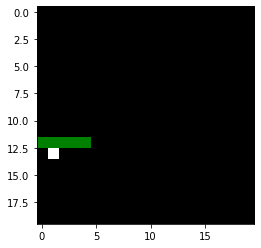

In [12]:
display_image(shredded_screen)

In [13]:
shredded_screen[18][0]

array([0, 0, 0], dtype=uint8)

## Flat RGB to gray scale screen

In [14]:
def gray_scale_screen(rgb_screen):
    red = rgb_screen[:, :, 0]
    green = rgb_screen[:, :, 1]
    blue = rgb_screen[:, :, 2]
    gray_screen = red*0.299 + green*0.587 + blue*0.114
    return gray_screen

In [15]:
gray_screen = gray_scale_screen(shredded_screen)
gray_screen.shape

(20, 20)

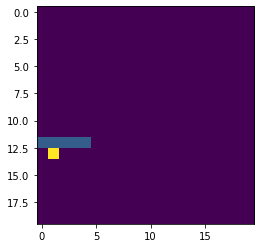

In [16]:
display_image(gray_screen)

## Normalize to range 0 - 1 

In [17]:
def normalize_screen_to_range_0_1(screen):
    normalized_screnn = screen / MAX_PIXEL_VALUE
    return normalized_screnn

In [18]:
normalized_screen = normalize_screen_to_range_0_1(gray_screen)
normalized_screen.shape

(20, 20)

In [19]:
normalized_screen[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

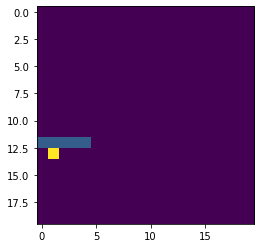

In [20]:
display_image(normalized_screen)

## Preprocess_screen function

In [22]:
def preprocess_screen(captured_screen):
    cutted_screen = cut_screen(captured_screen)
    shredded_screen = shred_screen(cutted_screen)
    gray_screen = gray_scale_screen(shredded_screen)
    normalized_screen = normalize_screen_to_range_0_1(gray_screen)
    return normalized_screen

## Test

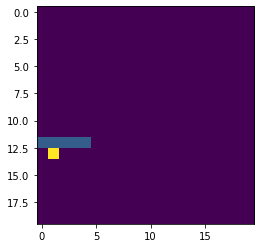

In [23]:
preprocessed_screen = preprocess_screen(captured_screen)
display_image(preprocessed_screen)